Note: this notebook is used as a playground for testing scripts, algos, results, EDA, etc. It will not ve refreshed by any shceduled job.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import bt
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 5]
import plotly.graph_objects as go
import yfinance as yf
import talib
import datetime
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')
import chewie_pack

## Importing Dataset

In [2]:
df = pd.read_csv('ticker_data.csv', index_col='Date', parse_dates=True)
indicators = chewie_pack.indicators

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24720 entries, 2014-09-17 to 2022-02-17
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          24720 non-null  float64
 1   High          24720 non-null  float64
 2   Low           24720 non-null  float64
 3   Close         24720 non-null  float64
 4   Volume        24720 non-null  int64  
 5   Dividends     24720 non-null  float64
 6   Stock Splits  24720 non-null  float64
 7   ticker        24720 non-null  object 
 8   nom_change    24710 non-null  float64
 9   pct_change    24710 non-null  float64
 10  SMA_10        24630 non-null  float64
 11  SMA_50        24230 non-null  float64
 12  EMA_10        24630 non-null  float64
 13  EMA_50        24230 non-null  float64
 14  ADX_10        23730 non-null  float64
 15  ADX_50        23730 non-null  float64
 16  RSI_10        24620 non-null  float64
 17  RSI_50        24220 non-null  float64
 18  BB_10_upp

In [4]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'ticker', 'nom_change', 'pct_change', 'SMA_10', 'SMA_50', 'EMA_10',
       'EMA_50', 'ADX_10', 'ADX_50', 'RSI_10', 'RSI_50', 'BB_10_upper',
       'BB_10_middle', 'BB_10_lower', 'BB_50_upper', 'BB_50_middle',
       'BB_50_lower', 'sg_SMA_Cross', 'sg_EMA_Cross', 'sg_ADX_10', 'sg_ADX_50',
       'sg_RSI_10', 'sg_RSI_50', 'sg_BB_10', 'sg_BB_50'],
      dtype='object')

In [5]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,nom_change,pct_change,SMA_10,...,ADX_10,ADX_50,RSI_10,RSI_50,BB_10_upper,BB_10_middle,BB_10_lower,BB_50_upper,BB_50_middle,BB_50_lower
count,24720.000000,24720.000000,24720.000000,24720.000000,2.472000e+04,24720.000000,24720.000000,24710.000000,24710.000000,24630.000000,...,23730.000000,23730.000000,24620.000000,24220.000000,24630.000000,24630.000000,24630.000000,24230.000000,24230.000000,24230.000000
mean,1746.039296,1784.689719,1703.418754,1747.664090,3.015736e+09,0.001658,0.000769,2.027857,0.181728,1743.735993,...,14.310084,14.310096,54.228149,53.557645,1877.283972,1743.736002,1610.188032,2057.615469,1727.097184,1396.578899
std,6360.782237,6530.734694,6167.100808,6364.183530,8.880432e+09,0.026249,0.061993,257.253256,3.521275,6342.930577,...,6.167632,6.167650,14.914674,7.175989,6919.048071,6342.930584,5781.362119,7662.920554,6252.754665,4915.328480
min,0.023954,0.025993,0.019130,0.023961,7.922000e+03,0.000000,0.000000,-7554.040000,-42.350000,0.030000,...,3.640650,3.640000,7.230000,29.340000,0.028709,0.026482,-0.062973,0.040473,0.032968,-21.469339
25%,38.189302,38.840501,37.679999,38.292318,5.696963e+06,0.000000,0.000000,-1.100000,-0.910000,38.542500,...,9.489219,9.490000,43.670000,48.550000,40.613085,38.542649,36.294438,43.328577,39.387944,34.566969
50%,162.489011,164.407458,160.348677,162.349983,5.552249e+07,0.000000,0.000000,0.010000,0.090000,162.085000,...,13.131048,13.130000,54.220000,53.350000,170.754558,162.086329,154.495851,186.253659,161.419490,140.449148
75%,1082.282471,1099.104980,1067.942505,1083.789978,2.446180e+09,0.000000,0.000000,1.847500,1.160000,1084.680000,...,17.545420,17.547500,65.020000,58.160000,1135.301979,1084.679990,1027.957705,1199.281507,1087.468449,982.080394
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11,0.750000,7.000000,7293.020000,136.680000,64698.850000,...,42.958320,42.960000,97.310000,84.980000,69025.163291,64698.849609,61368.912953,72219.851101,60801.771016,54468.973445


## Testing strategies

In [6]:
#df_test = df[df.index.year>=2020]
#df_test = df_test[df_test.ticker=='MSFT']
df_test = df.loc[(df.ticker=='MSFT') & (df.index>'2020-01-01')] #& (df.index<'2022-02-04')]

<AxesSubplot:title={'center':'Backtest result'}>

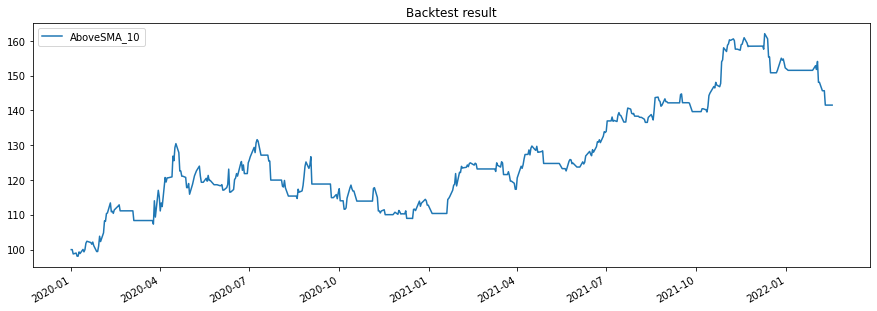

In [7]:
#df_test = df[df.ticker=='MSFT']['Close'].to_frame()
df_test = df.loc[(df.ticker=='MSFT') & (df.index>'2020-01-01')] #& (df.index<'2022-02-04')]
price = df_test.Close.to_frame(name='Close')
ref = df_test.SMA_10.to_frame(name='Close')

# Define the signal-based strategy
bt_strategy = bt.Strategy('AboveSMA_10',
                        [bt.algos.SelectWhere( price > ref ),
                        bt.algos.WeighEqually(),
                        bt.algos.Rebalance()])

# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, price)
bt_result = bt.run(bt_backtest)

# Plot the backtest result
bt_result.plot(title='Backtest result')

# !!!!Reminder to correct all the sg_MA_x

<AxesSubplot:title={'center':'Backtest result'}>

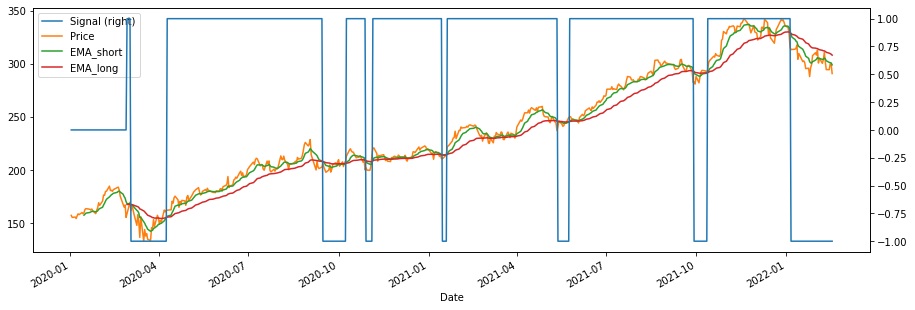

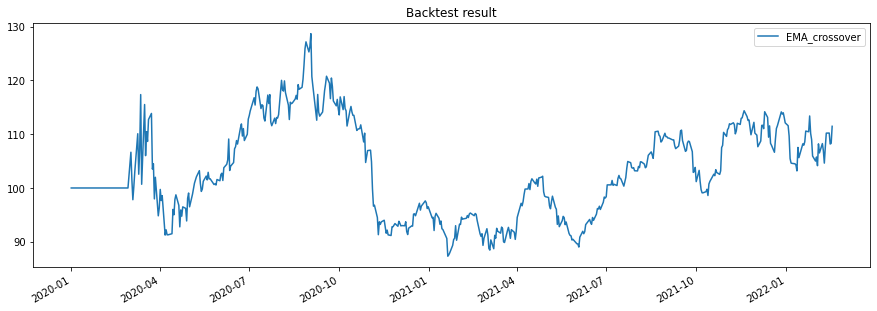

In [8]:
#### MA crossover strategy
df_test = df.loc[(df.ticker=='MSFT') & (df.index>'2020-01-01')] #& (df.index<'2022-02-04')]
price = df_test.Close.to_frame(name='Close')

# Calculate the indicators
EMA_short = talib.EMA(df_test['Close'], timeperiod=10).to_frame(name='Close')
EMA_long = talib.EMA(df_test['Close'], timeperiod=40).to_frame(name='Close')

# Create the signal DataFrame
signal = EMA_long.copy()
signal[EMA_long.isnull()] = 0
# Construct the signal
signal[EMA_short > EMA_long] = 1
signal[EMA_short < EMA_long] = -1

# Plot the signal, price and MAs
combined_df = bt.merge(signal, price, EMA_short, EMA_long)
combined_df.columns = ['Signal', 'Price', 'EMA_short', 'EMA_long']
combined_df.plot(secondary_y=['Signal'])

# Define the strategy
bt_strategy = bt.Strategy('EMA_crossover', 
                [bt.algos.WeighTarget(signal), 
                bt.algos.Rebalance()])

# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, price)
bt_result = bt.run(bt_backtest)

# Plot the backtest result
bt_result.plot(title='Backtest result')

In [9]:
signal.reset_index().Close.value_counts()

 1.0    399
-1.0    100
 0.0     39
Name: Close, dtype: int64

In [10]:
df_test.sg_RSI_10.apply(chewie_pack.BHS_to_sg).value_counts()

 0    503
-1     34
 1      1
Name: sg_RSI_10, dtype: int64

In [11]:
df_test.sg_RSI_10.value_counts()

hold    503
sell     34
buy       1
Name: sg_RSI_10, dtype: int64

<AxesSubplot:title={'center':'Backtest result'}>

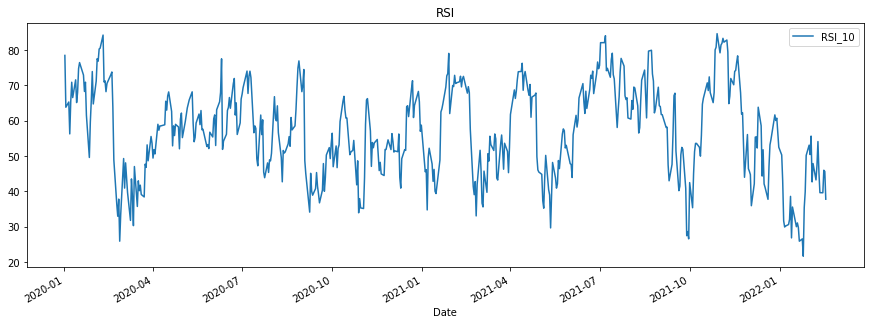

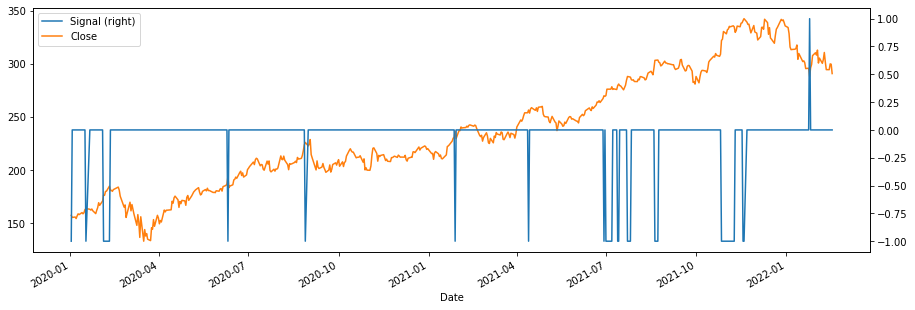

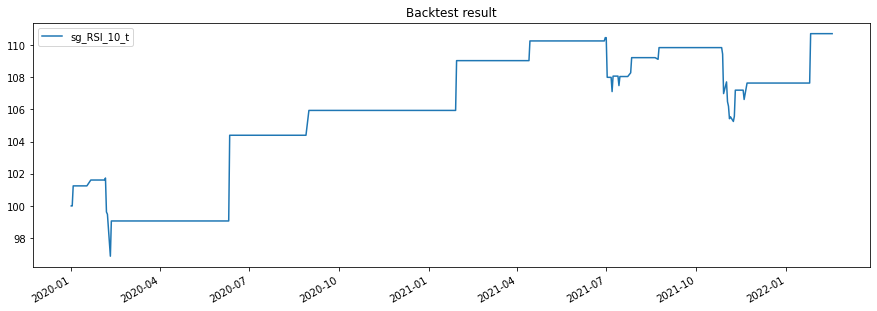

In [12]:
#### RSI-based Mean Reversion Strategy
df_test = df.loc[(df.ticker=='MSFT') & (df.index>'2020-01-01')] #& (df.index<'2022-02-04')]
close = df_test.Close.to_frame(name='Close')
sg_RSI_10_t = df_test.sg_RSI_10.to_frame(name='Close')

# Construct the signal
signal = df_test.sg_RSI_10.apply(chewie_pack.BHS_to_sg).to_frame(name='Close')

df_test.RSI_10.to_frame().plot()
plt.title('RSI')

# Plot the signal, price and MAs
combined_df = bt.merge(signal, close, sg_RSI_10_t)
combined_df.columns = ['Signal', 'Close', 'sg_RSI_10_t']
combined_df.plot(secondary_y=['Signal'])

# Define the strategy
bt_strategy = bt.Strategy('sg_RSI_10_t', 
                [bt.algos.WeighTarget(signal), 
                bt.algos.Rebalance()])

# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, close)
bt_result = bt.run(bt_backtest)

# Plot the backtest result
bt_result.plot(title='Backtest result')


In [13]:
#### Benchmarking example
def buy_and_hold(df, ticker, signal_name, start='2020-01-01', end='2021-12-31'):
    # Get the data
    close = df.loc[(df.ticker==ticker) & (df.index>start) & (df.index<end)]['Close'].to_frame()
    # Define the benchmark strategy
    bt_strategy = bt.Strategy(signal_name,
        [bt.algos.RunOnce(),
        bt.algos.SelectAll(),
        bt.algos.WeighEqually(),
        bt.algos.Rebalance()])
    # Return the backtest
    return bt.Backtest(bt_strategy, close)

In [14]:
#### Strategy Optimization example
def signal_rever(df, ticker, signal_name, start='2020-01-01', end='2021-12-31'):
    close = df.loc[(df.ticker==ticker) & (df.index>start) & (df.index<end)]['Close'].to_frame()
    signal = df.loc[(df.ticker==ticker) & (df.index>start) & (df.index<end)][signal_name]
    signal = signal.apply(chewie_pack.BHS_to_sg).to_frame(name='Close')    
    # Define the signal-based strategy
    bt_strategy = bt.Strategy(signal_name,
                 [bt.algos.WeighTarget(signal), 
                bt.algos.Rebalance()]) 
    return bt.Backtest(bt_strategy, close)

In [15]:
# Strategy Optimization example
def signal_trend(df, ticker, signal_name, start='2020-01-01', end='2021-12-31'):
    close = df.loc[(df.ticker==ticker) & (df.index>start) & (df.index<end)]['Close'].to_frame()
    signal = df.loc[(df.ticker==ticker) & (df.index>start) & (df.index<end)][signal_name]
    signal = signal.apply(chewie_pack.BHS_to_sg).to_frame(name='Close')
    # Define the signal-based strategy
    bt_strategy = bt.Strategy(signal_name,
        [bt.algos.SelectWhere(signal),
        bt.algos.WeighEqually(),
        bt.algos.Rebalance()])
    return bt.Backtest(bt_strategy, close)

In [16]:
chewie_pack.indicators

['sg_SMA_Cross',
 'sg_EMA_Cross',
 'sg_ADX_10',
 'sg_ADX_50',
 'sg_RSI_10',
 'sg_RSI_50',
 'sg_BB_10',
 'sg_BB_50']

In [17]:
ticker='MSFT'
start='2020-01-01'
end='2022-02-04'

benchmark = buy_and_hold(df=df, ticker=ticker, signal_name='Buy_and_Hold', start=start, end=end)
sg_RSI_10 = signal_rever(df=df, ticker=ticker, signal_name='sg_RSI_10', start=start, end=end)
sg_RSI_50 = signal_rever(df=df, ticker=ticker, signal_name='sg_RSI_50', start=start, end=end)
sg_AboveSMA_10 = signal_trend(df=df, ticker=ticker, signal_name='sg_AboveSMA_10', start=start, end=end)
sg_AboveSMA_50 = signal_trend(df=df, ticker=ticker, signal_name='sg_AboveSMA_50', start=start, end=end)
# Run all backtests and plot the resutls
bt_results = bt.run(benchmark, sg_RSI_10, sg_RSI_50, sg_AboveSMA_10, sg_AboveSMA_50)
bt_results.plot(title='Strategies for {}'.format(ticker))

KeyError: 'sg_AboveSMA_10'

<AxesSubplot:title={'center':'Strategies for BTC-USD'}>

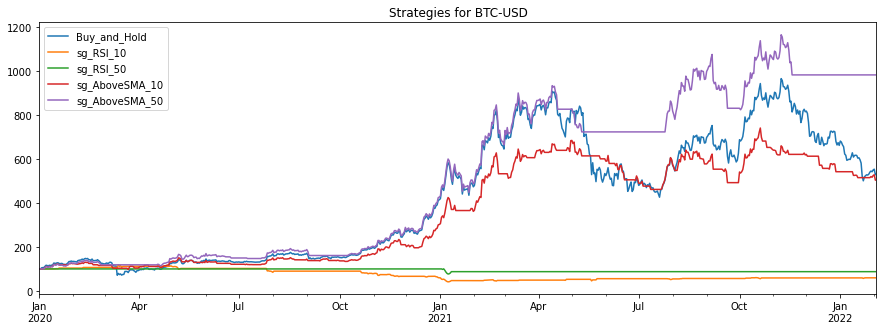

In [ ]:
ticker='BTC-USD'
start='2020-01-01'
end='2022-02-04'

benchmark = buy_and_hold(df=df, ticker=ticker, signal_name='Buy_and_Hold', start=start, end=end)
sg_RSI_10 = signal_rever(df=df, ticker=ticker, signal_name='sg_RSI_10', start=start, end=end)
sg_RSI_50 = signal_rever(df=df, ticker=ticker, signal_name='sg_RSI_50', start=start, end=end)
sg_AboveSMA_10 = signal_trend(df=df, ticker=ticker, signal_name='sg_AboveSMA_10', start=start, end=end)
sg_AboveSMA_50 = signal_trend(df=df, ticker=ticker, signal_name='sg_AboveSMA_50', start=start, end=end)
# Run all backtests and plot the resutls
bt_results = bt.run(benchmark, sg_RSI_10, sg_RSI_50, sg_AboveSMA_10, sg_AboveSMA_50)
bt_results.plot(title='Strategies for {}'.format(ticker))

In [ ]:
test = {'a':1,'b':2}
test['b']

2

In [ ]:
for i in bt_results.keys():
    print(i)

Buy_and_Hold
sg_RSI_10
sg_RSI_50
sg_AboveSMA_10
sg_AboveSMA_50


In [ ]:
bt_results.prices

,Buy_and_Hold,sg_RSI_10,sg_RSI_50,sg_AboveSMA_10,sg_AboveSMA_50
2020-01-01,100.000000,100.000000,100.000000,100.000000,100.000000
2020-01-02,100.000000,100.000000,100.000000,100.000000,100.000000
2020-01-03,105.139621,100.000000,100.000000,100.000000,100.000000
2020-01-04,106.080167,100.000000,100.000000,100.894505,100.000000
2020-01-05,106.089615,100.000000,100.000000,100.903490,100.008853
...,...,...,...,...,...
2022-01-30,542.329478,59.525525,87.607971,517.317227,983.148438
2022-01-31,550.416463,59.525525,87.607971,525.008345,983.148438
2022-02-01,554.136586,59.525525,87.607971,528.546364,983.148438
2022-02-02,528.535452,59.525525,87.607971,504.198433,983.148438


In [ ]:
bt_results['Buy_and_Hold'].prices

2020-01-01    100.000000
2020-01-02    100.000000
2020-01-03    105.139621
2020-01-04    106.080167
2020-01-05    106.089615
                 ...    
2022-01-30    542.329478
2022-01-31    550.416463
2022-02-01    554.136586
2022-02-02    528.535452
2022-02-03    531.418578
Name: Buy_and_Hold, Length: 765, dtype: float64

In [ ]:
#http://pmorissette.github.io/ffn/ffn.html#ffn.core.GroupStats
bt_results.to_csv()


'Stat,Buy_and_Hold,sg_RSI_10,sg_RSI_50,sg_AboveSMA_10,sg_AboveSMA_50\nStart,2020-01-01,2020-01-01,2020-01-01,2020-01-01,2020-01-01\nEnd,2022-02-03,2022-02-03,2022-02-03,2022-02-03,2022-02-03\nRisk-free rate,0.00%,0.00%,0.00%,0.00%,0.00%\n,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\nTotal Return,431.42%,-40.47%,-12.39%,404.20%,883.15%\nDaily Sharpe,1.20,-0.52,-0.42,1.47,1.92\nDaily Sortino,1.94,-0.69,-0.51,2.64,3.44\nCAGR,122.24%,-21.96%,-6.13%,116.72%,198.23%\nMax Drawdown,-53.06%,-65.43%,-23.42%,-32.55%,-25.38%\nCalmar Ratio,2.30,-0.34,-0.26,3.59,7.81\n,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\nMTD,-3.45%,0.00%,0.00%,-3.96%,0.00%\n3m,-40.99%,0.95%,0.00%,-20.95%,-9.54%\n6m,-2.62%,9.09%,0.00%,-8.04%,25.90%\nYTD,-19.76%,0.95%,0.00%,-7.06%,0.00%\n1Y,-0.85%,26.70%,0.00%,23.13%,78.28%\n3Y (ann.),122.24%,-21.96%,-6.13%,116.72%,198.23%\n5Y (ann.),-,-,-,-,-\n10Y (ann.),-,-,-,-,-\nSince Incep. (ann.),122.24%,-21.96%,-6.13%,116.72%,198.23%\n,,,,,,,

In [ ]:
bt_results.stats

,Buy_and_Hold,sg_RSI_10,sg_RSI_50,sg_AboveSMA_10,sg_AboveSMA_50
start,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00
end,2022-02-03 00:00:00,2022-02-03 00:00:00,2022-02-03 00:00:00,2022-02-03 00:00:00,2022-02-03 00:00:00
rf,0.0,0.0,0.0,0.0,0.0
total_return,4.314186,-0.404745,-0.12392,4.041984,8.831484
cagr,1.222357,-0.219647,-0.06129,1.167189,1.982272
max_drawdown,-0.530556,-0.654282,-0.234244,-0.325499,-0.253799
calmar,2.303919,-0.335707,-0.26165,3.585851,7.810413
mtd,-0.034515,0.0,0.0,-0.039637,0.0
three_month,-0.409915,0.009526,0.0,-0.209506,-0.095397
six_month,-0.026163,0.090916,0.0,-0.080446,0.259021


In [ ]:
bt_results.stats.index

Index(['start', 'end', 'rf', 'total_return', 'cagr', 'max_drawdown', 'calmar',
       'mtd', 'three_month', 'six_month', 'ytd', 'one_year', 'three_year',
       'five_year', 'ten_year', 'incep', 'daily_sharpe', 'daily_sortino',
       'daily_mean', 'daily_vol', 'daily_skew', 'daily_kurt', 'best_day',
       'worst_day', 'monthly_sharpe', 'monthly_sortino', 'monthly_mean',
       'monthly_vol', 'monthly_skew', 'monthly_kurt', 'best_month',
       'worst_month', 'yearly_sharpe', 'yearly_sortino', 'yearly_mean',
       'yearly_vol', 'yearly_skew', 'yearly_kurt', 'best_year', 'worst_year',
       'avg_drawdown', 'avg_drawdown_days', 'avg_up_month', 'avg_down_month',
       'win_year_perc', 'twelve_month_win_perc'],
      dtype='object')

In [ ]:
stats_to_display = ['total_return', 'cagr', 'max_drawdown', 'calmar',
       'daily_sharpe', 'daily_sortino', 'daily_mean', 'daily_vol', 'daily_skew', 'daily_kurt', 
       'best_day', 'worst_day', 
       'monthly_sharpe', 'monthly_sortino', 'monthly_mean', 'monthly_vol', 'monthly_skew', 'monthly_kurt', 
       'best_month', 'worst_month', 
       'avg_drawdown', 'avg_drawdown_days', 'avg_up_month', 'avg_down_month']
bt_results.stats.loc[stats_to_display].shape#.to_dict('records')

(24, 5)

In [ ]:
d_columns_stats = [{'id':x, 'name':x} for x in chewie_pack.indicators]
d_columns_stats

[{'id': 'sg_SMA_Cross', 'name': 'sg_SMA_Cross'},
 {'id': 'sg_EMA_Cross', 'name': 'sg_EMA_Cross'},
 {'id': 'sg_ADX_10', 'name': 'sg_ADX_10'},
 {'id': 'sg_ADX_50', 'name': 'sg_ADX_50'},
 {'id': 'sg_RSI_10', 'name': 'sg_RSI_10'},
 {'id': 'sg_RSI_50', 'name': 'sg_RSI_50'},
 {'id': 'sg_BB_10', 'name': 'sg_BB_10'},
 {'id': 'sg_BB_50', 'name': 'sg_BB_50'}]

In [ ]:
to_define_better = 'Buy_and_Hold','sg_RSI_10','sg_RSI_50','sg_AboveSMA_10','sg_AboveSMA_50'
d_columns_stats = [{'id':x, 'name':x} for x in to_define_better]
#df_stats = pd.DataFrame()
#df_stats
pd.DataFrame(columns=to_define_better, index=stats_to_display)#.to_dict('records')

,Buy_and_Hold,sg_RSI_10,sg_RSI_50,sg_AboveSMA_10,sg_AboveSMA_50
total_return,NaN,NaN,NaN,NaN,NaN
cagr,NaN,NaN,NaN,NaN,NaN
max_drawdown,NaN,NaN,NaN,NaN,NaN
calmar,NaN,NaN,NaN,NaN,NaN
daily_sharpe,NaN,NaN,NaN,NaN,NaN
daily_sortino,NaN,NaN,NaN,NaN,NaN
daily_mean,NaN,NaN,NaN,NaN,NaN
daily_vol,NaN,NaN,NaN,NaN,NaN
daily_skew,NaN,NaN,NaN,NaN,NaN
daily_kurt,NaN,NaN,NaN,NaN,NaN


In [ ]:
bt_results.stats.loc[stats_to_display].reset_index().to_dict('records')

[{'index': 'total_return',
  'Buy_and_Hold': 4.314185782714836,
  'sg_RSI_10': -0.4047447548828129,
  'sg_RSI_50': -0.12392028906250019,
  'sg_AboveSMA_10': 4.041984329101559,
  'sg_AboveSMA_50': 8.831484379394547},
 {'index': 'cagr',
  'Buy_and_Hold': 1.2223570281114648,
  'sg_RSI_10': -0.21964711433859196,
  'sg_RSI_50': -0.061289901944596936,
  'sg_AboveSMA_10': 1.1671893199712722,
  'sg_AboveSMA_50': 1.982272216867789},
 {'index': 'max_drawdown',
  'Buy_and_Hold': -0.5305555361976673,
  'sg_RSI_10': -0.6542815808612485,
  'sg_RSI_50': -0.23424387447252937,
  'sg_AboveSMA_10': -0.32549858292750067,
  'sg_AboveSMA_50': -0.25379864888611114},
 {'index': 'calmar',
  'Buy_and_Hold': 2.303919089925499,
  'sg_RSI_10': -0.33570731740524395,
  'sg_RSI_50': -0.26164996665381157,
  'sg_AboveSMA_10': 3.5858506954890306,
  'sg_AboveSMA_50': 7.810412803881032},
 {'index': 'daily_sharpe',
  'Buy_and_Hold': 1.203512459839632,
  'sg_RSI_10': -0.5216858841975597,
  'sg_RSI_50': -0.415894910794721,
 

In [ ]:
df_test2 = bt_results.stats.loc[stats_to_display]
df_test2.astype(float).round(2)#.info()

,Buy_and_Hold,sg_RSI_10,sg_RSI_50,sg_AboveSMA_10,sg_AboveSMA_50
total_return,4.31,-0.40,-0.12,4.04,8.83
cagr,1.22,-0.22,-0.06,1.17,1.98
max_drawdown,-0.53,-0.65,-0.23,-0.33,-0.25
calmar,2.30,-0.34,-0.26,3.59,7.81
daily_sharpe,1.20,-0.52,-0.42,1.47,1.92
daily_sortino,1.94,-0.69,-0.51,2.64,3.44
daily_mean,0.75,-0.14,-0.04,0.62,0.85
daily_vol,0.63,0.26,0.09,0.42,0.44
daily_skew,-0.86,-0.97,-4.64,0.83,0.59
daily_kurt,12.05,25.45,139.14,6.26,5.78


In [ ]:
strategies = ['Buy_and_Hold','sg_SMA_Cross','sg_EMA_Cross','sg_RSI_10','sg_RSI_50','sg_BB_10','sg_BB_50']
d_columns_stats = ['Stat']+strategies
d_columns_stats = [{'id':x, 'name':x} for x in d_columns_stats]
d_columns_stats


[{'id': 'Stat', 'name': 'Stat'},
 {'id': 'Buy_and_Hold', 'name': 'Buy_and_Hold'},
 {'id': 'sg_SMA_Cross', 'name': 'sg_SMA_Cross'},
 {'id': 'sg_EMA_Cross', 'name': 'sg_EMA_Cross'},
 {'id': 'sg_RSI_10', 'name': 'sg_RSI_10'},
 {'id': 'sg_RSI_50', 'name': 'sg_RSI_50'},
 {'id': 'sg_BB_10', 'name': 'sg_BB_10'},
 {'id': 'sg_BB_50', 'name': 'sg_BB_50'}]

## Getting data more dense than daily
https://medium.com/@jsteinb/python-adding-features-to-your-stock-market-dashboard-with-plotly-4208d8bc3bd5 \
https://medium.com/@jsteinb/python-build-a-program-to-retrieve-and-graph-live-stock-market-data-311d9ca1b7d3 \
https://tradologics.com/ \

In [24]:
import yfinance as yf

In [28]:
yf.download(tickers='BTC-USD', period='1y', interval='1m')

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BTC-USD: 1m data not available for startTime=1613725560 and endTime=1645261560. Only 7 days worth of 1m granularity data are allowed to be fetched per request.


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [29]:
yf.download(tickers='BTC-USD', period='2y', interval='5m')

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BTC-USD: 5m data not available for startTime=1582189565 and endTime=1645261565. The requested range must be within the last 60 days.


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [39]:
yf.download(tickers='BTC-USD', period='2y', interval='1h')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2020-02-19 09:00:00+00:00,10129.571289,10134.795898,10112.287109,10118.188477,10118.188477,0
2020-02-19 10:00:00+00:00,10118.778320,10128.080078,10102.345703,10121.063477,10121.063477,17227776
2020-02-19 11:00:00+00:00,10108.551758,10160.802734,10108.551758,10160.802734,10160.802734,0
2020-02-19 12:00:00+00:00,10162.750977,10179.924805,10132.086914,10133.918945,10133.918945,333426688
2020-02-19 13:00:00+00:00,10132.254883,10143.647461,10123.360352,10124.887695,10124.887695,0
...,...,...,...,...,...,...
2022-02-19 06:00:00+00:00,40252.363281,40418.878906,40245.261719,40407.539062,40407.539062,201828352
2022-02-19 07:00:00+00:00,40402.906250,40402.906250,40297.527344,40297.527344,40297.527344,63981568
2022-02-19 08:00:00+00:00,40291.199219,40306.546875,40069.574219,40074.507812,40074.507812,80965632
2022-02-19 09:00:00+00:00,40071.160156,40071.160156,40010.320312,40018.312500,40018.312500,165888


In [38]:
yf.download(tickers='TSLA', period='2y', interval='1h')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2020-02-19 09:30:00-05:00,184.699997,187.776001,180.302002,185.000000,185.000000,9232124
2020-02-19 10:30:00-05:00,185.212662,188.956009,184.856003,187.548996,187.548996,3869643
2020-02-19 11:30:00-05:00,187.500198,188.445999,184.860001,185.492004,185.492004,2717401
2020-02-19 12:30:00-05:00,185.484497,185.931992,182.000000,185.600006,185.600006,3322557
2020-02-19 13:30:00-05:00,185.632996,185.699997,183.373962,184.164001,184.164001,1418226
...,...,...,...,...,...,...
2022-02-18 11:30:00-05:00,848.659973,853.630005,844.520020,849.954407,849.954407,2118620
2022-02-18 12:30:00-05:00,850.530029,851.280029,837.609985,841.169983,841.169983,2393895
2022-02-18 13:30:00-05:00,840.829895,857.880005,840.260010,857.265015,857.265015,2351142
2022-02-18 14:30:00-05:00,857.150024,863.080017,852.219971,855.500000,855.500000,3119508


In [47]:
np.where(df['pct_change']<0, 'red', 'green')

array(['green', 'red', 'red', ..., 'green', 'red', 'red'], dtype='<U5')

In [50]:
['red' if x<0 else 'green' for x in df['pct_change']]

['green',
 'red',
 'red',
 'green',
 'red',
 'green',
 'green',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'green',
 'red',
 'red',
 'red',
 'red',
 'red',
 'green',
 'green',
 'green',
 'green',
 'red',
 'green',
 'green',
 'green',
 'green',
 'red',
 'red',
 'green',
 'green',
 'red',
 'red',
 'green',
 'red',
 'red',
 'red',
 'red',
 'green',
 'red',
 'green',
 'red',
 'green',
 'red',
 'red',
 'green',
 'green',
 'green',
 'green',
 'green',
 'red',
 'green',
 'green',
 'green',
 'green',
 'green',
 'red',
 'red',
 'red',
 'green',
 'red',
 'red',
 'green',
 'red',
 'red',
 'green',
 'green',
 'green',
 'red',
 'red',
 'green',
 'green',
 'red',
 'green',
 'green',
 'green',
 'red',
 'red',
 'green',
 'red',
 'green',
 'red',
 'red',
 'red',
 'green',
 'green',
 'red',
 'green',
 'red',
 'red',
 'red',
 'red',
 'green',
 'green',
 'red',
 'green',
 'green',
 'red',
 'red',
 'green',
 'red',
 'green',
 'red',
 'red',
 'green',
 'red',
 'green',
 'red',
 'red',
 'green',
 'gree

In [44]:
df['pct_change'] 

Date
2014-09-17     NaN
2014-09-18   -7.19
2014-09-19   -6.98
2014-09-20    3.57
2014-09-21   -2.47
              ... 
2022-02-11   -2.02
2022-02-14    0.14
2022-02-15    2.32
2022-02-16   -0.14
2022-02-17   -2.13
Name: pct_change, Length: 24720, dtype: float64